In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

os.chdir(Path(os.getcwd()).resolve().parents[0])
#print(os.getcwd())
import setup
from source import plotFunctions

is_windows = sys.platform.startswith('win')
sep = '\\'

if is_windows == False:
    sep = '/'

path = os.getcwd()+sep+'data'+sep

In [2]:
keeping_percentage_mean = pd.read_csv('results\\keeping_percentage_mean.csv',
                                      sep=';', header=0, 
                                      index_col=0)
keeping_excluding_mean = 1-keeping_percentage_mean
display(keeping_excluding_mean)

,HELL,HELL2,BBD -1
1CSurr,0.61,0.70,0.79
5CVT,0.67,0.81,0.76
4CE1CF,0.69,0.85,0.90
4CR,0.69,0.81,0.86
4CRE-V1,0.74,0.73,0.80
4CRE-V2,0.71,0.84,0.85
1CDT,0.75,0.77,0.79
1CHT,0.70,0.78,0.79
CHECKERBOARD,0.83,0.82,0.75
FG-2C-2D,0.69,0.76,0.78


In [3]:
keeping_percentage_std = pd.read_csv('results\\keeping_percentage_std.csv',
                                      sep=';', header=0, 
                                      index_col=0)
display(keeping_percentage_std)

,HELL,HELL2,BBD -1
1CSurr,0.15,0.05,0.09
5CVT,0.17,0.04,0.14
4CE1CF,0.19,0.05,0.01
4CR,0.19,0.07,0.04
4CRE-V1,0.16,0.09,0.11
4CRE-V2,0.19,0.04,0.05
1CDT,0.15,0.06,0.08
1CHT,0.19,0.04,0.06
CHECKERBOARD,0.08,0.01,0.15
FG-2C-2D,0.19,0.10,0.12


In [4]:
display(keeping_percentage_mean == keeping_percentage_std)

,HELL,HELL2,BBD -1
1CSurr,False,False,False
5CVT,False,False,False
4CE1CF,False,False,False
4CR,False,False,False
4CRE-V1,False,False,False
4CRE-V2,False,False,False
1CDT,False,False,False
1CHT,False,False,False
CHECKERBOARD,False,False,False
FG-2C-2D,False,False,False


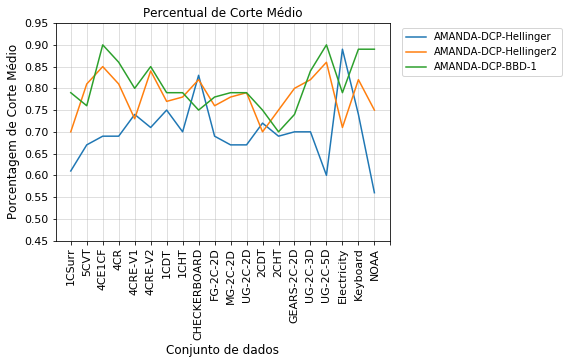

In [9]:
import numpy as np

listOfMethods = ['AMANDA-DCP-Hellinger','AMANDA-DCP-Hellinger2','AMANDA-DCP-BBD-1']
for c in keeping_excluding_mean.columns:
    alphas = np.array(keeping_excluding_mean[c].values)
    x = range(len(alphas))
    ax = plt.axes()
    ax.plot(x, alphas, zorder=2)
    ax.tick_params(axis='both', which='major', labelsize=11)

plt.title("Percentual de Corte Médio".format(c), fontsize=12)
plt.legend(listOfMethods, bbox_to_anchor = (1.02,1))
plt.ylim([0.45,0.95])
plt.yticks(np.arange(0.45, 1, 0.05))
plt.xticks(range(0, 21, 1), keeping_excluding_mean.index, rotation=90)
plt.ylabel("Porcentagem de Corte Médio", fontsize=12)
plt.xlabel("Conjunto de dados", fontsize=12)
plt.grid(zorder=1, alpha=0.5)
plt.show()

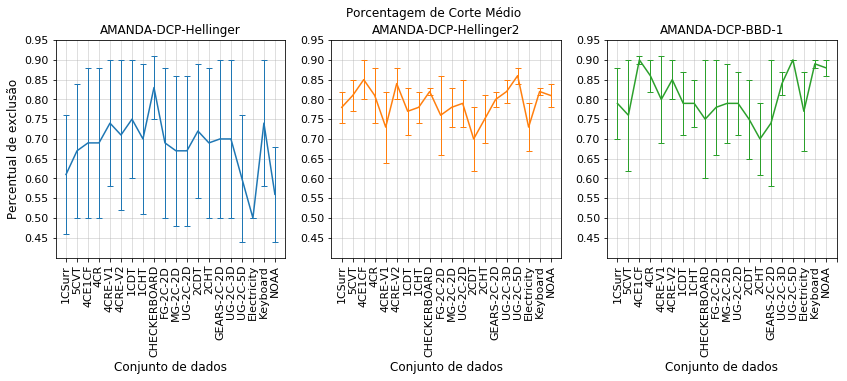

In [140]:
listOfColors = ['tab:blue', 'tab:orange','tab:green']

fig, axs = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(14,4))
fig.suptitle('Porcentagem de Corte Médio', fontsize=12,y=0.995)

for c,i in zip(keeping_excluding_mean.columns, range(len(listOfMethods))):
    alphas = np.array(keeping_excluding_mean[c].values)
    x = range(len(alphas))
    ax = axs[i]
    ax.errorbar(x, alphas, yerr=keeping_percentage_std[c].values,
                elinewidth=1, capsize=3, zorder=2, color=listOfColors[i])

    ax.set_title("{}".format(listOfMethods[i]))
    ax.set_ylim([0.40,0.95])    
    ylabels = ax.get_yticklabels()
    ax.set_xticks(range(0, 21, 1))
    ax.set_yticks(np.arange(0.45, 1, 0.05))
    ax.set_xticklabels(keeping_excluding_mean.index, rotation=90)
    if (i == 0):
        ax.set_ylabel("Percentual de exclusão", fontsize=12)
    ax.set_xlabel("Conjunto de dados", fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=11)
    ax.grid(zorder=1, alpha=0.5)
plt.show()